In [1]:
# % matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree

from L5.validation import confusion_matrix, print_scores

In [3]:
data = pd.read_csv("/home/lukasz/Pobrane/bank.csv", sep=";")
data[:20]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
for attribute in ("job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"):
    data[attribute] = pd.Categorical(data[attribute]).codes
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
data["month"] = list(map(lambda month: months.index(month), data["month"]))
data["day"] = list(map(lambda date: date[0] * 31 + date[1], zip(data["month"], data["day"])))
data = data.drop(['month'], axis=1)

# marital = ["single", "married", "divorced", "unknown"]
# 
# data["marital"] = list(map(lambda attr: marital.index(attr), data["marital"]))

data[:40]

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,298,79,1,-1,0,3,no
1,33,7,1,1,0,4789,1,1,0,135,220,1,339,4,0,no
2,35,4,2,2,0,1350,1,0,0,109,185,1,330,1,0,no
3,30,4,1,2,0,1476,1,1,2,158,199,4,-1,0,3,no
4,59,1,1,1,0,0,1,0,2,129,226,1,-1,0,3,no
5,35,4,2,2,0,747,0,0,0,54,141,2,176,3,0,no
6,36,6,1,2,0,307,1,0,0,138,341,1,330,2,1,no
7,39,9,1,1,0,147,1,0,0,130,151,2,-1,0,3,no
8,41,2,1,2,0,221,1,0,2,138,57,2,-1,0,3,no
9,43,7,1,0,0,-88,1,1,0,110,313,1,147,2,0,no


In [5]:
bank_labels = data["y"].values
bank_data = data.drop(["y"], axis = 1).values

In [5]:
for max_leaf_nodes in range(10, 21, 2):
    classifier = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
    print_scores(classifier, bank_data, bank_labels, max_leaf_nodes)

10: 0.898473788985
[0.88716814159292035, 0.90486725663716816, 0.86283185840707965, 0.8915929203539823, 0.87610619469026552, 0.91371681415929207, 0.88938053097345138, 0.92699115044247793, 0.88938053097345138, 0.87858719646799122]
0.89206225947


12: 0.906215439062


[0.88495575221238942, 0.90486725663716816, 0.86283185840707965, 0.8915929203539823, 0.87831858407079644, 0.91814159292035402, 0.8915929203539823, 0.92035398230088494, 0.89601769911504425, 0.88079470198675491]
0.892946726836


14: 0.907100199071


[0.88716814159292035, 0.89601769911504425, 0.86504424778761058, 0.89601769911504425, 0.87831858407079644, 0.91814159292035402, 0.8915929203539823, 0.91814159292035402, 0.89601769911504425, 0.88962472406181015]
0.893608490105


16: 0.908869719089
[0.88495575221238942, 0.89380530973451322, 0.86504424778761058, 0.89380530973451322, 0.88274336283185839, 0.91814159292035402, 0.8915929203539823, 0.91814159292035402, 0.89601769911504425, 0.88079470198675491]
0.89250424896


18: 0.909312099093


[0.88716814159292035, 0.90486725663716816, 0.86725663716814161, 0.8915929203539823, 0.88716814159292035, 0.92256637168141598, 0.8915929203539823, 0.91814159292035402, 0.89823008849557517, 0.88741721854304634]
0.895600128934


20: 0.911302809113


[0.88495575221238942, 0.89601769911504425, 0.86946902654867253, 0.88938053097345138, 0.88495575221238942, 0.92256637168141598, 0.8915929203539823, 0.9247787610619469, 0.90044247787610621, 0.87637969094922741]
0.894053898298




In [6]:
for min_samples_leaf in range(4, 21, 4):
    classifier = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    print_scores(classifier, bank_data, bank_labels, min_samples_leaf)

4: 0.952222959522


[0.87831858407079644, 0.88938053097345138, 0.85398230088495575, 0.88716814159292035, 0.87389380530973448, 0.89380530973451322, 0.87610619469026552, 0.90707964601769908, 0.89601769911504425, 0.85651214128035325]
0.881226435367


8: 0.93497013935


[0.88274336283185839, 0.88495575221238942, 0.87168141592920356, 0.88716814159292035, 0.87610619469026552, 0.89601769911504425, 0.88716814159292035, 0.91371681415929207, 0.89380530973451322, 0.88741721854304634]
0.88807800504


12: 0.928113249281


[0.86946902654867253, 0.89823008849557517, 0.87168141592920356, 0.8915929203539823, 0.87610619469026552, 0.90265486725663713, 0.89380530973451322, 0.9247787610619469, 0.89601769911504425, 0.88520971302428253]
0.890954599621


16: 0.920371599204


[0.85176991150442483, 0.91814159292035402, 0.86725663716814161, 0.88274336283185839, 0.87389380530973448, 0.91150442477876104, 0.88938053097345138, 0.93584070796460173, 0.88716814159292035, 0.88520971302428253]
0.890290882807


20: 0.91395708914


[0.86504424778761058, 0.90044247787610621, 0.86725663716814161, 0.88716814159292035, 0.87610619469026552, 0.91371681415929207, 0.8915929203539823, 0.91592920353982299, 0.88495575221238942, 0.88300220750551872]
0.888521459689




In [7]:
for max_depth in range(4, 11, 2):
    classifier = tree.DecisionTreeClassifier(max_depth=max_depth)
    print_scores(classifier, bank_data, bank_labels, max_depth)

4: 0.909754479098
[0.88274336283185839, 0.90929203539823011, 0.8584070796460177, 0.90044247787610621, 0.88053097345132747, 0.90929203539823011, 0.88716814159292035, 0.92035398230088494, 0.89823008849557517, 0.89183222958057395]
0.893829240657


6: 0.924795399248


[0.88274336283185839, 0.90044247787610621, 0.85398230088495575, 0.90265486725663713, 0.87831858407079644, 0.91814159292035402, 0.88053097345132747, 0.91592920353982299, 0.90265486725663713, 0.88520971302428253]
0.892060794311


8: 0.942932979429


[0.87610619469026552, 0.90929203539823011, 0.87389380530973448, 0.90486725663716816, 0.87168141592920356, 0.91371681415929207, 0.87831858407079644, 0.91371681415929207, 0.88938053097345138, 0.87196467991169979]
0.890293813124


10: 0.963946029639


[0.86504424778761058, 0.90486725663716816, 0.85619469026548678, 0.90486725663716816, 0.88053097345132747, 0.88938053097345138, 0.87389380530973448, 0.90486725663716816, 0.90265486725663713, 0.86534216335540837]
0.884764304831




In [8]:
for max_leaf_nodes in range(10, 101, 10):
    classifier = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
    print_scores(classifier, bank_data, bank_labels, max_leaf_nodes)

10: 0.898473788985
[0.88716814159292035, 0.90486725663716816, 0.86283185840707965, 0.8915929203539823, 0.87610619469026552, 0.91371681415929207, 0.88938053097345138, 0.92699115044247793, 0.88938053097345138, 0.87858719646799122]
0.89206225947


20: 0.911302809113


[0.88495575221238942, 0.89601769911504425, 0.86946902654867253, 0.88938053097345138, 0.88495575221238942, 0.92256637168141598, 0.8915929203539823, 0.9247787610619469, 0.90044247787610621, 0.87637969094922741]
0.894053898298


30: 0.920813979208


[0.88274336283185839, 0.8915929203539823, 0.86725663716814161, 0.89380530973451322, 0.87831858407079644, 0.92035398230088494, 0.89380530973451322, 0.92256637168141598, 0.89823008849557517, 0.87637969094922741]
0.892505225732


40: 0.927670869277


[0.88274336283185839, 0.89601769911504425, 0.86283185840707965, 0.8915929203539823, 0.87389380530973448, 0.92256637168141598, 0.89601769911504425, 0.90707964601769908, 0.89380530973451322, 0.8741721854304636]
0.8900720858


50: 0.930767529308
[0.88495575221238942, 0.89823008849557517, 0.86283185840707965, 0.8915929203539823, 0.88274336283185839, 0.91814159292035402, 0.89380530973451322, 0.91371681415929207, 0.8915929203539823, 0.88079470198675491]
0.891840532146




60: 0.93497013935
[0.88053097345132747, 0.89601769911504425, 0.86061946902654862, 0.90044247787610621, 0.88053097345132747, 0.91371681415929207, 0.8915929203539823, 0.91592920353982299, 0.88938053097345138, 0.87858719646799122]
0.890734825841


70: 0.93895155939


[0.88053097345132747, 0.8915929203539823, 0.86946902654867253, 0.89823008849557517, 0.88274336283185839, 0.91371681415929207, 0.87610619469026552, 0.91371681415929207, 0.89601769911504425, 0.87858719646799122]
0.890071109027


80: 0.943375359434
[0.87168141592920356, 0.90044247787610621, 0.86725663716814161, 0.89823008849557517, 0.88053097345132747, 0.90929203539823011, 0.87610619469026552, 0.91814159292035402, 0.88938053097345138, 0.8741721854304636]


0.888523413233


90: 0.945144879451
[0.87610619469026552, 0.89823008849557517, 0.86504424778761058, 0.89601769911504425, 0.88495575221238942, 0.90929203539823011, 0.87389380530973448, 0.91371681415929207, 0.88938053097345138, 0.8741721854304636]
0.888080935357


100: 

0.949126299491
[0.87168141592920356, 0.91150442477876104, 0.85176991150442483, 0.89601769911504425, 0.87831858407079644, 0.90929203539823011, 0.87610619469026552, 0.91814159292035402, 0.88716814159292035, 0.8741721854304636]
0.887417218543




In [9]:
for max_leaf_nodes in range(10, 21, 2):
    classifier = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, 
                                             criterion="entropy")
    print_scores(classifier, bank_data, bank_labels, max_leaf_nodes)

10: 0.895598318956
[0.87389380530973448, 0.91150442477876104, 0.86283185840707965, 0.90265486725663713, 0.87389380530973448, 0.90044247787610621, 0.88053097345132747, 0.91814159292035402, 0.89601769911504425, 0.87858719646799122]
0.889849870089


12: 

0.895598318956
[0.87389380530973448, 0.90707964601769908, 0.86061946902654862, 0.90044247787610621, 0.87610619469026552, 0.91150442477876104, 0.88495575221238942, 0.92035398230088494, 0.89601769911504425, 0.87858719646799122]
0.89095606478


14: 

0.897146648971
[0.86946902654867253, 0.90707964601769908, 0.86061946902654862, 0.89823008849557517, 0.87610619469026552, 0.91150442477876104, 0.88495575221238942, 0.92035398230088494, 0.88716814159292035, 0.87858719646799122]
0.889407392213


16: 

0.897146648971


[0.86946902654867253, 0.90707964601769908, 0.8584070796460177, 0.89823008849557517, 0.87610619469026552, 0.91150442477876104, 0.88495575221238942, 0.92035398230088494, 0.88716814159292035, 0.87858719646799122]
0.889186153275


18: 0.897589028976


[0.86946902654867253, 0.90707964601769908, 0.8584070796460177, 0.89823008849557517, 0.87168141592920356, 0.91150442477876104, 0.88495575221238942, 0.92035398230088494, 0.88716814159292035, 0.87858719646799122]
0.888743675399


20: 0.897589028976


[0.86946902654867253, 0.90707964601769908, 0.8584070796460177, 0.89823008849557517, 0.87168141592920356, 0.91150442477876104, 0.88716814159292035, 0.92035398230088494, 0.88716814159292035, 0.87858719646799122]
0.888964914337




In [10]:
for min_samples_leaf in range(4, 21, 4):
    classifier = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,
                                             criterion="entropy")
    print_scores(classifier, bank_data, bank_labels, min_samples_leaf)

4: 0.958637469586


[0.85619469026548678, 0.88938053097345138, 0.85176991150442483, 0.87389380530973448, 0.87168141592920356, 0.89601769911504425, 0.88716814159292035, 0.90265486725663713, 0.88938053097345138, 0.85209713024282563]
0.877023872316


8: 0.935633709356


[0.87389380530973448, 0.88495575221238942, 0.86725663716814161, 0.87831858407079644, 0.86946902654867253, 0.88938053097345138, 0.88495575221238942, 0.92035398230088494, 0.88274336283185839, 0.86754966887417218]
0.88188771025


12: 0.926343729263


[0.87610619469026552, 0.87610619469026552, 0.84955752212389379, 0.87389380530973448, 0.87389380530973448, 0.90265486725663713, 0.90044247787610621, 0.92035398230088494, 0.8915929203539823, 0.8741721854304636]
0.883877395534


16: 0.920371599204


[0.87831858407079644, 0.90044247787610621, 0.87831858407079644, 0.88495575221238942, 0.86725663716814161, 0.90044247787610621, 0.89601769911504425, 0.9247787610619469, 0.89823008849557517, 0.8741721854304636]
0.890293324738


20: 0.914841849148


[0.88716814159292035, 0.8915929203539823, 0.86725663716814161, 0.89601769911504425, 0.86946902654867253, 0.90929203539823011, 0.89380530973451322, 0.91150442477876104, 0.88938053097345138, 0.88520971302428253]
0.890069643869




In [11]:
for max_depth in range(4, 11, 2):
    classifier = tree.DecisionTreeClassifier(max_depth=max_depth,
                                             criterion="entropy")
    print_scores(classifier, bank_data, bank_labels, max_depth)

4: 0.89404998894
[0.89380530973451322, 0.90707964601769908, 0.85398230088495575, 0.90265486725663713, 0.87610619469026552, 0.91371681415929207, 0.88274336283185839, 0.90265486725663713, 0.88274336283185839, 0.88300220750551872]
0.889848893317


6: 0.918823269188


[0.87831858407079644, 0.90486725663716816, 0.8584070796460177, 0.8915929203539823, 0.88274336283185839, 0.90265486725663713, 0.88938053097345138, 0.91814159292035402, 0.89601769911504425, 0.88300220750551872]
0.890512610131


8: 0.940057509401


[0.88495575221238942, 0.88495575221238942, 0.88053097345132747, 0.89380530973451322, 0.87168141592920356, 0.90486725663716816, 0.88716814159292035, 0.92256637168141598, 0.87389380530973448, 0.87858719646799122]
0.888301197523


10: 0.961070559611


[0.86725663716814161, 0.88053097345132747, 0.86504424778761058, 0.87168141592920356, 0.88053097345132747, 0.91592920353982299, 0.87831858407079644, 0.90929203539823011, 0.86946902654867253, 0.86092715231788075]
0.879898024966




In [12]:
for max_leaf_nodes in range(10, 101, 10):
    classifier = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes,
                                             criterion="entropy")
    print_scores(classifier, bank_data, bank_labels, max_leaf_nodes)

10: 0.895598318956
[0.87389380530973448, 0.91150442477876104, 0.86283185840707965, 0.90265486725663713, 0.87389380530973448, 0.90044247787610621, 0.88053097345132747, 0.91814159292035402, 0.89601769911504425, 0.87858719646799122]
0.889849870089


20: 

0.897589028976


[0.86946902654867253, 0.90707964601769908, 0.8584070796460177, 0.89823008849557517, 0.87168141592920356, 0.91150442477876104, 0.88716814159292035, 0.92035398230088494, 0.88716814159292035, 0.87858719646799122]
0.888964914337


30: 0.900464499005


[0.87168141592920356, 0.89380530973451322, 0.86283185840707965, 0.89380530973451322, 0.87389380530973448, 0.90707964601769908, 0.88716814159292035, 0.91592920353982299, 0.88716814159292035, 0.87196467991169979]
0.886532751177


40: 0.911302809113


[0.88495575221238942, 0.89380530973451322, 0.86504424778761058, 0.8915929203539823, 0.87389380530973448, 0.90929203539823011, 0.88938053097345138, 0.92256637168141598, 0.88716814159292035, 0.87196467991169979]
0.888966379496


50: 0.914178279142


[0.87831858407079644, 0.90486725663716816, 0.86283185840707965, 0.89380530973451322, 0.88495575221238942, 0.90707964601769908, 0.88495575221238942, 0.91150442477876104, 0.88716814159292035, 0.88300220750551872]
0.889848893317


60: 0.918380889184


[0.87168141592920356, 0.91371681415929207, 0.86725663716814161, 0.89380530973451322, 0.88716814159292035, 0.90707964601769908, 0.88716814159292035, 0.90707964601769908, 0.88053097345132747, 0.88079470198675491]
0.889628142765


70: 0.921698739217


[0.87389380530973448, 0.91592920353982299, 0.86725663716814161, 0.8915929203539823, 0.88274336283185839, 0.90265486725663713, 0.88716814159292035, 0.91150442477876104, 0.87831858407079644, 0.8741721854304636]
0.888523413233


80: 0.924353019244


[0.87389380530973448, 0.91150442477876104, 0.86946902654867253, 0.88716814159292035, 0.87831858407079644, 0.90265486725663713, 0.89380530973451322, 0.90707964601769908, 0.88053097345132747, 0.87196467991169979]
0.887638945867


90: 0.927892059279


[0.86725663716814161, 0.90707964601769908, 0.87389380530973448, 0.88716814159292035, 0.88053097345132747, 0.90486725663716816, 0.88495575221238942, 0.90707964601769908, 0.88716814159292035, 0.87196467991169979]
0.887196467991


100: 0.93696084937


[0.87168141592920356, 0.90265486725663713, 0.87389380530973448, 0.88716814159292035, 0.88495575221238942, 0.90044247787610621, 0.88716814159292035, 0.90486725663716816, 0.88716814159292035, 0.86754966887417218]
0.886754966887




In [13]:
bank_tree = tree.DecisionTreeClassifier(max_leaf_nodes=18)
bank_tree.fit(bank_data, bank_labels)
with open("L5/trees/bank.dot", "w") as f:
    tree.export_graphviz(bank_tree, out_file=f, feature_names=data.columns[:-1])

In [15]:
confusion_matrix(
    tree.DecisionTreeClassifier(max_leaf_nodes=18),
    bank_data,
    bank_labels
)

array([[2503,  185],
       [ 173,  153]])

In [6]:
from sklearn import ensemble
random_forest = ensemble.RandomForestClassifier()
random_forest.fit(bank_data, bank_labels)
print(random_forest.score(bank_data, bank_labels))

0.9893828798938288


/usr/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
import numpy as np
err = 0
predictions = []
for decision_tree in random_forest.estimators_:
    predictions.append(decision_tree.predict(bank_data))
# print(next(iris_data.iterrows()))
# random_forest_iris.predict(iris_data)
predictions_array = np.array(predictions)
for i in range(len(bank_labels)):
    if len(set(predictions_array[:, i])) != 1:
        err += 1
print(err/len(bank_labels))
#         print(i, predictions_array[:, i])

0.2840079628400796


In [9]:
proximity_matrix = np.zeros((len(bank_labels), len(bank_labels)))
for tree_res_1 in predictions:
    for tree_res_2 in predictions:
        proximity_matrix += (np.array([tree_res_1]).T 
                             == np.array([tree_res_2])).astype(int)
proximity_matrix

array([[100., 100., 100., ..., 100., 100.,  60.],
       [100., 100., 100., ..., 100., 100.,  60.],
       [100., 100., 100., ..., 100., 100.,  60.],
       ...,
       [100., 100., 100., ..., 100., 100.,  60.],
       [100., 100., 100., ..., 100., 100.,  60.],
       [ 60.,  60.,  60., ...,  60.,  60.,  52.]])

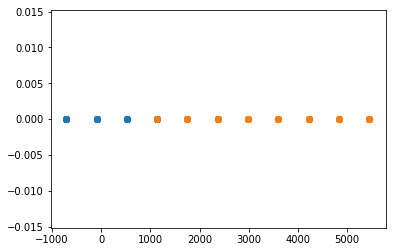

In [10]:
from sklearn.decomposition import PCA as sk_PCA

titanic_pca = sk_PCA().fit_transform(proximity_matrix)
# print(iris_pca.eigenvalues)
reduced_data = titanic_pca.T[:2].astype(float)
# print(reduced_data)
from matplotlib import pyplot

for target in set(bank_labels):
    correct_target = (target == bank_labels)
    pyplot.scatter(reduced_data[0][correct_target], reduced_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()